# Business Analytics
## Financial Analytics
(C) 2021

In [5]:
from IPython.display import HTML, display

def optional_material():
    '''
    When run in a cell, this function will color the cell blue to indicate
    the material is optional
    '''
    script =  "var cell = this.closest('.code_cell');"
    script += "var editor = cell.querySelector('.input_area');"
    script += "editor.style.background='#bde4f0';"
    script += "this.parentNode.removeChild(this)"
    
    display(HTML(f'<img src onerror="{script}">'))
    
optional_material()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:900px !important; }</style>"))

# Introducing `sklearn`

### Linear regression in `sklearn`

In [6]:
# Import linear models from sklearn
from sklearn import linear_model

In [7]:
import pandas as pd
df_apt = pd.read_excel('/Users/gujiajun/Downloads/UWS_Apt.xlsx').drop(columns=['Property.Type', 'ZIP.code'])
df_apt.columns = [i.replace('.','_') for i in df_apt.columns]
df_apt.head(2)

,Price_per_SqFt,SqFt,Nb_of_Bedrooms,Nb_of_Bathrooms,Number_of_Rooms,Floor,Doorman,Gym
0,1476.894640,541,0.0,1.0,0.5,17,1,1
1,1910.413476,1306,3.0,2.5,5.5,14,1,1


In [8]:
import statsmodels.formula.api as smf
linear_regression = smf.ols('''Price_per_SqFt ~ SqFt + Nb_of_Bedrooms + Nb_of_Bathrooms
                                + Number_of_Rooms + Floor + Doorman + Gym''', data=df_apt).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Price_per_SqFt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          1.50e-183
Time:                        13:36:38   Log-Likelihood:                -10508.
No. Observations:                1464   AIC:                         2.103e+04
Df Residuals:                    1456   BIC:                         2.107e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         781.5170     36.760     21.260      0.000     709.408     853.626
SqFt               -0.1215      0.042     -2.870      0.004      -0.205      -0.038
Nb_of_Bedrooms     89.5421     20.848      4.295      0.000      48.648     130.437
Nb_of_Bathrooms   307.5958     23.933     12.853      0.000     260.650     354.542
Number_of_Rooms   -46.4018     14.655     -3.166      0.002     -75.149     -17.655
Floor              11.2889      1.131      9.984      0.000       9.071      13.507
Doorman           162.0367     25.738      6.296      0.000     111.550     212.524
Gym               147.4430     18.698      7.886      0.000     110.765     184.121
==============================================================================
Omnibus:                      132.001   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.780
Skew:                           0.654   Prob(JB):                     1.70e-46
Kurtosis:                       4.320   Cond. No.                     5.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
linear_regression.predict(df_apt)

0       1501.555400
1       1872.730394
2       1021.763739
3       1303.547569
4       1061.697612
           ...     
1459    1330.741650
1460    2292.110719
1461    1387.153119
1462    1521.820083
1463    1114.928961
Length: 1464, dtype: float64

In [10]:
linear_regression = linear_model.LinearRegression()

In [11]:
X = df_apt.drop(columns='Price_per_SqFt')
y = df_apt.Price_per_SqFt

In [12]:
linear_regression.fit(X, y)

LinearRegression()

In [13]:
linear_regression.intercept_

781.5169948496343

In [14]:
linear_regression.coef_

array([-1.21528716e-01,  8.95421268e+01,  3.07595838e+02, -4.64018127e+01,
        1.12888708e+01,  1.62036706e+02,  1.47443000e+02])

In [15]:
pd.DataFrame({'col_names':['Intercept'] + X.columns.tolist(),
                 'coeffs':[linear_regression.intercept_] + linear_regression.coef_.tolist()})

,col_names,coeffs
0,Intercept,781.516995
1,SqFt,-0.121529
2,Nb_of_Bedrooms,89.542127
3,Nb_of_Bathrooms,307.595838
4,Number_of_Rooms,-46.401813
5,Floor,11.288871
6,Doorman,162.036706
7,Gym,147.443000


In [16]:
linear_regression.predict(X)

array([1501.55540025, 1872.73039364, 1021.76373864, ..., 1387.15311903,
       1521.82008262, 1114.92896052])

In [17]:
import sklearn.metrics as sk_m

predicted_vals = linear_regression.predict(X)
sk_m.r2_score(y, predicted_vals)

0.44926201520287845

### Logistic regression in `sklearn`

In [19]:
df_nomis = pd.read_excel('/Users/gujiajun/Downloads/Nomis data (1).xlsx')

In [20]:
df_nomis_sub = df_nomis[['Rate', 'Competition rate', 'Outcome']].copy()

df_nomis_sub = df_nomis_sub.rename(columns={'Competition rate':'Competition_rate'})

df_nomis_sub.head()

,Rate,Competition_rate,Outcome
0,7.49,6.25,0
1,5.49,5.65,0
2,5.49,5.65,0
3,8.99,6.25,0
4,5.49,5.65,0


In [21]:
import statsmodels.formula.api as smf

logistic_reg = smf.logit('Outcome ~ Rate + Competition_rate', data=df_nomis_sub).fit()

logistic_reg.summary()

Optimization terminated successfully.
         Current function value: 0.511217
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:               208085
Model:                          Logit   Df Residuals:                   208082
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Sep 2023   Pseudo R-squ.:                 0.02987
Time:                        13:37:33   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0965e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.3491      0.045    -95.842      0.000      -4.438      -4.260
Rate                -0.1379      0.004    -33.824      0.000      -0.146      -0.130
Competition_rate     0.7922      0.010     79.478      0.000       0.773       0.812
====================================================================================
"""

In [22]:
import sklearn.linear_model as sk_lm

logistic_reg = sk_lm.LogisticRegression(penalty='none')

X = df_nomis_sub[['Rate', 'Competition_rate']]
y = df_nomis_sub.Outcome

logistic_reg.fit(X, y)

print(logistic_reg.intercept_)
print(logistic_reg.coef_)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[-4.3491978]
[[-0.13784947  0.79217734]]


In [23]:
logistic_reg.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
logistic_reg.predict_proba(X)

array([[0.60601262, 0.39398738],
       [0.65253241, 0.34746759],
       [0.65253241, 0.34746759],
       ...,
       [0.88498259, 0.11501741],
       [0.80464232, 0.19535768],
       [0.76417515, 0.23582485]])

In [25]:
[i[1] for i in logistic_reg.predict_proba(X)]

[0.39398737742235634,
 0.3474675910315452,
 0.3474675910315452,
 0.34584443020037103,
 0.3474675910315452,
 0.22687029035841524,
 0.42396502368405825,
 0.37252965858420367,
 0.34584443020037103,
 0.338151143626512,
 0.2739221929715207,
 0.338151143626512,
 0.36773041751638536,
 0.37252965858420367,
 0.39398737742235634,
 0.42396502368405825,
 0.338151143626512,
 0.3474675910315452,
 0.338151143626512,
 0.30217466724974845,
 0.410558461702221,
 0.30217466724974845,
 0.42396502368405825,
 0.4256268205861175,
 0.19917035195639096,
 0.3474675910315452,
 0.338151143626512,
 0.2503981612958819,
 0.2739221929715207,
 0.42396502368405825,
 0.39398737742235634,
 0.36164105638263333,
 0.3474675910315452,
 0.30217466724974845,
 0.30217466724974845,
 0.42396502368405825,
 0.3474675910315452,
 0.37252965858420367,
 0.410558461702221,
 0.338151143626512,
 0.338151143626512,
 0.22687029035841524,
 0.3474675910315452,
 0.3505996413272464,
 0.338151143626512,
 0.3474675910315452,
 0.39398737742235634,


In [26]:
df_nomis_sub = df_nomis[['Rate', 'Amount', 'Outcome']].copy()

df_nomis_sub.head()

,Rate,Amount,Outcome
0,7.49,35000.0,0
1,5.49,40000.0,0
2,5.49,18064.0,0
3,8.99,15415.0,0
4,5.49,32000.0,0


In [27]:
logistic_reg = smf.logit('Outcome ~ Rate + Amount', data=df_nomis_sub).fit()
logistic_reg.summary()

Optimization terminated successfully.
         Current function value: 0.452447
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:               208085
Model:                          Logit   Df Residuals:                   208082
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Sep 2023   Pseudo R-squ.:                  0.1414
Time:                        13:37:35   Log-Likelihood:                -94147.
converged:                       True   LL-Null:                   -1.0965e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8176      0.028     64.549      0.000       1.762       1.873
Rate          -0.1152      0.004    -30.502      0.000      -0.123      -0.108
Amount        -0.0001   6.97e-07   -152.148      0.000      -0.000      -0.000
==============================================================================
"""

In [28]:
logistic_reg = sk_lm.LogisticRegression(penalty='none')

X = df_nomis_sub[['Rate', 'Amount']]
y = df_nomis_sub.Outcome

logistic_reg.fit(X, y)

print(logistic_reg.intercept_)
print(logistic_reg.coef_)

[1.29108906e-10]
[[-1.27924544e-09 -5.89654470e-05]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


# Financial analytics

In [29]:
# Install the yahoo finance API
#!pip install yfinance

In [33]:
import yfinance as yf

df_ibm = yf.download('IBM', start='2010-01-01', end='2021-12-01').reset_index()

[*********************100%***********************]  1 of 1 completed


In [34]:
df_ibm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,125.411087,127.122368,125.095604,126.625237,78.345848,6438444
1,2010-01-05,125.889099,126.051628,124.378586,125.095604,77.399437,7156104
2,2010-01-06,124.933075,125.707458,124.101341,124.282982,76.896652,5863144
3,2010-01-07,124.158699,124.521988,123.240921,123.852776,76.630493,6109268
4,2010-01-08,123.393883,125.162521,123.374763,125.095604,77.399437,4390271


In [35]:
df_ibm.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2994,2021-11-23,116.790001,117.940002,116.040001,116.790001,107.208931,4912800
2995,2021-11-24,116.160004,117.269997,116.080002,116.730003,107.153854,3220800
2996,2021-11-26,115.000000,116.339996,114.559998,115.809998,106.309326,3322000
2997,2021-11-29,118.620003,119.610001,117.529999,118.500000,108.778633,8949800
2998,2021-11-30,117.500000,119.239998,116.449997,117.099998,107.493500,9252700


In [36]:
df_returns = df_ibm.copy()
df_returns['return_today'] = (df_returns['Adj Close']/df_returns['Adj Close'].shift(1)) - 1
df_returns['return_1D'] = df_returns.return_today.shift(1)
df_returns = df_returns[['Date', 'return_today', 'return_1D']]
df_returns = df_returns[(df_returns.Date >= '2012-07-02')
                             & (df_returns.Date <= '2012-12-31')]
df_returns.head()

,Date,return_today,return_1D
629,2012-07-02,0.001278,0.021839
630,2012-07-03,0.000511,0.001278
631,2012-07-05,-0.003266,0.000511
632,2012-07-06,-0.019868,-0.003266
633,2012-07-09,-0.009090,-0.019868


In [37]:
import statsmodels.formula.api as smf
linear_1d = smf.ols('return_today ~ return_1D', data=df_returns).fit()
linear_1d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           return_today   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.287
Date:                Thu, 14 Sep 2023   Prob (F-statistic):             0.0405
Time:                        13:37:39   Log-Likelihood:                 394.70
No. Observations:                 125   AIC:                            -785.4
Df Residuals:                     123   BIC:                            -779.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.337e-05      0.001     -0.058      0.954      -0.002       0.002
return_1D      0.1809      0.087      2.071      0.040       0.008       0.354
==============================================================================
Omnibus:                       27.005   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.306
Skew:                          -0.602   Prob(JB):                     6.76e-25
Kurtosis:                       7.464   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

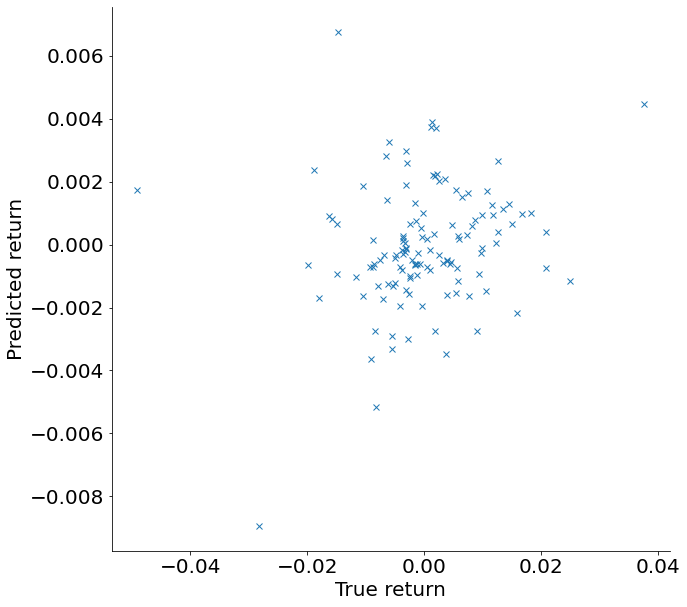

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))

plt.plot(df_returns.return_today, linear_1d.predict(df_returns), marker='x', linewidth=0)

plt.xlabel('True return', fontsize=20)
plt.ylabel('Predicted return', fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.despine()

### A simple trading strategy

In [39]:
import numpy as np

df_returns['pred_return_today'] = linear_1d.predict(df_returns)
df_returns['decision_last_night'] = np.sign(df_returns.pred_return_today)
df_returns['strategy_return'] = 1 + (df_returns.return_today * df_returns.decision_last_night)
df_returns['cumulative_return'] = df_returns.strategy_return.cumprod()

df_returns.head(3)

,Date,return_today,return_1D,pred_return_today,decision_last_night,strategy_return,cumulative_return
629,2012-07-02,0.001278,0.021839,0.003898,1.0,1.001278,1.001278
630,2012-07-03,0.000511,0.001278,0.000178,1.0,1.000511,1.001790
631,2012-07-05,-0.003266,0.000511,0.000039,1.0,0.996734,0.998517


In [40]:
df_returns.tail(3)

,Date,return_today,return_1D,pred_return_today,decision_last_night,strategy_return,cumulative_return
751,2012-12-27,0.003960,-0.002339,-0.000477,-1.0,0.996040,1.245819
752,2012-12-28,-0.014945,0.003960,0.000663,1.0,0.985055,1.227200
753,2012-12-31,0.009060,-0.014945,-0.002758,-1.0,0.990940,1.216081


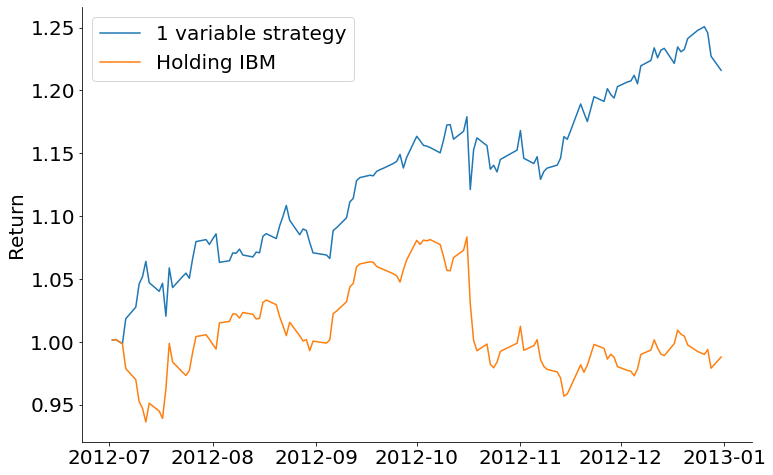

In [41]:
plt.figure(figsize=(12, 8))

plt.plot(df_returns.Date, df_returns.cumulative_return, label='1 variable strategy')
plt.plot(df_returns.Date, (1+df_returns.return_today).cumprod(), label='Holding IBM')

plt.legend(fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('Return', fontsize=20)

sns.despine()

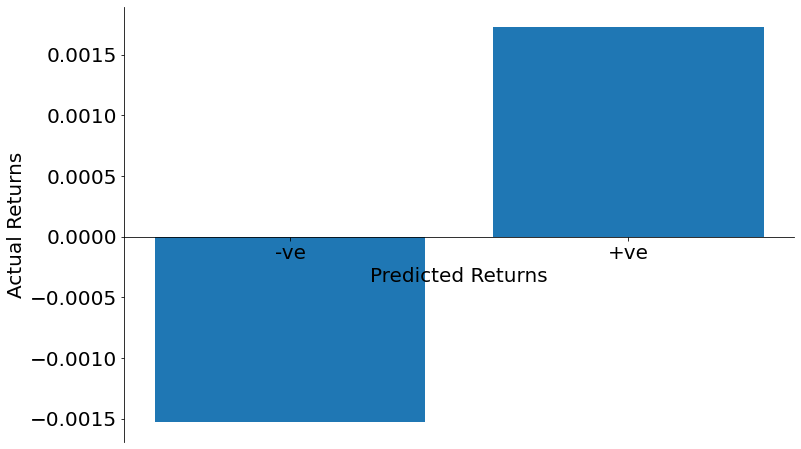

In [42]:
# Explaining how our model works so well

plt.figure(figsize=(12, 8))
ax = plt.axes()

plt.bar(['-ve', '+ve'],
            [df_returns[df_returns.pred_return_today < 0].return_today.mean(),
                df_returns[df_returns.pred_return_today > 0].return_today.mean()])

plt.xlabel('Predicted Returns', fontsize=20)
plt.ylabel('Actual Returns', fontsize=20)

ax.spines['bottom'].set_position(('data', 0))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.despine()

### Moving to a 14-variable model

In [43]:
df_returns_14 = df_ibm.copy()
df_returns_14['return_today'] = (df_returns_14['Adj Close']/
                                         df_returns_14['Adj Close'].shift(1)) - 1

In [44]:
lagged_cols = {'1D':1, '3D':3, '1W':7, '2W':2*7, '3W':3*7,
                '1M':30, '6W':6*7, '2M':2*30, '3M':3*30, '4M':4*30,
                   '5M':5*30, '6M':6*30, '9M':9*30, '1Y':365}

for col in lagged_cols:
    df_returns_14[f'return_{col}'] = ( df_returns_14.return_today
                                                    .rolling(lagged_cols[col])
                                                    .mean()
                                                    .shift(1) )

df_returns_14 = df_returns_14[['Date', 'return_today']
                                          + [f'return_{col}' for col in lagged_cols]]
df_returns_14 = df_returns_14[(df_returns_14.Date >= '2012-07-02')
                                  & (df_returns_14.Date <= '2012-12-31')]
df_returns_14.head(2)

,Date,return_today,return_1D,return_3D,return_1W,return_2W,return_3W,return_1M,return_6W,return_2M,return_3M,return_4M,return_5M,return_6M,return_9M,return_1Y
629,2012-07-02,0.001278,0.021839,0.006340,-0.002221,0.001204,0.000736,-0.000326,-0.001315,-0.000739,0.000194,0.000734,0.000744,0.000413,0.000792,0.000776
630,2012-07-03,0.000511,0.001278,0.004942,0.001835,0.000539,0.001740,0.000055,-0.001291,-0.000671,-0.000006,0.000758,0.000785,0.000399,0.000820,0.000778


In [45]:
X = df_returns_14.drop(columns=['Date', 'return_today']).copy()
y = df_returns_14.return_today

In [46]:
import sklearn.linear_model as sk_lm

linear_14d = sk_lm.LinearRegression()
linear_14d.fit(X, y)

LinearRegression()

In [47]:
df_returns_14['pred_return_today'] = linear_14d.predict(X)
df_returns_14['decision_last_night'] = np.sign(df_returns_14.pred_return_today)
df_returns_14['strategy_return'] = 1 + (df_returns_14.return_today
                                                * df_returns_14.decision_last_night)
df_returns_14['cumulative_return'] = df_returns_14.strategy_return.cumprod()

In [48]:
df_returns_14.tail(2)

,Date,return_today,return_1D,return_3D,return_1W,return_2W,return_3W,return_1M,return_6W,return_2M,return_3M,return_4M,return_5M,return_6M,return_9M,return_1Y,pred_return_today,decision_last_night,strategy_return,cumulative_return
752,2012-12-28,-0.014945,0.003960,-0.001218,-0.000657,0.001146,0.000385,0.000797,0.000384,-0.001096,-0.000362,0.000017,-0.000026,-0.000143,0.000352,0.000411,0.001907,1.0,0.985055,1.512387
753,2012-12-31,0.009060,-0.014945,-0.004441,-0.004319,-0.000769,-0.000514,0.000797,-0.000081,-0.001588,-0.000549,0.000058,-0.000102,-0.000232,0.000152,0.000374,-0.004372,-1.0,0.990940,1.498684


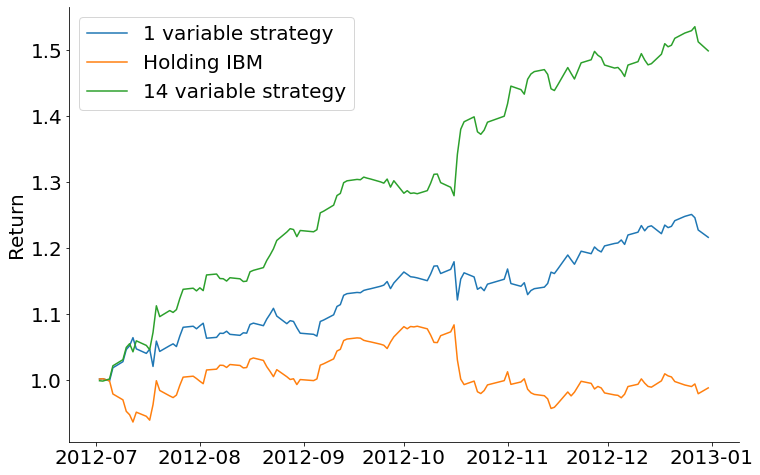

In [49]:
plt.figure(figsize=(12, 8))

plt.plot(df_returns.Date, df_returns.cumulative_return, label='1 variable strategy')
plt.plot(df_returns.Date, (1+df_returns.return_today).cumprod(), label='Holding IBM')
plt.plot(df_returns_14.Date, df_returns_14.cumulative_return, label='14 variable strategy')

plt.legend(fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('Return', fontsize=20)

sns.despine()

### The next 6 months

In [50]:
df_returns_all = df_ibm.copy()
df_returns_all['return_today'] = (df_returns_all['Adj Close']/
                                         df_returns_all['Adj Close'].shift(1)) - 1

In [51]:
lagged_cols = {'1D':1, '3D':3, '1W':7, '2W':2*7, '3W':3*7,
                '1M':30, '6W':6*7, '2M':2*30, '3M':3*30, '4M':4*30,
                   '5M':5*30, '6M':6*30, '9M':9*30, '1Y':365}

for col in lagged_cols:
    df_returns_all[f'return_{col}'] = ( df_returns_all.return_today
                                                      .rolling(lagged_cols[col])
                                                      .mean()
                                                      .shift(1) )

df_returns_all = df_returns_all[['Date', 'return_today']
                                          + [f'return_{col}' for col in lagged_cols]]

In [52]:
df_returns_early = df_returns_all[(df_returns_all.Date >= '2012-07-02')
                                      & (df_returns_all.Date <= '2012-12-31')].copy()

X_1_1var  = df_returns_early[['return_1D']]
X_1_14var = df_returns_early[[f'return_{i}' for i in lagged_cols]]
y_1       = df_returns_early.return_today

In [53]:
lm_1 = sk_lm.LinearRegression().fit(X_1_1var, y_1)
lm_14 = sk_lm.LinearRegression().fit(X_1_14var, y_1)

In [54]:
df_returns_late = df_returns_all[(df_returns_all.Date >= '2013-01-01')
                                      & (df_returns_all.Date <= '2013-06-30')].copy()

X_2_1var  = df_returns_late[['return_1D']]
X_2_14var = df_returns_late[[f'return_{i}' for i in lagged_cols]]
y_2       = df_returns_late.return_today

In [55]:
df_returns_late['pred_return_today_1'] = lm_1.predict(X_2_1var)
df_returns_late['pred_return_today_14'] = lm_14.predict(X_2_14var)

df_returns_late['decision_last_night_1'] = np.sign(df_returns_late.pred_return_today_1)
df_returns_late['decision_last_night_14'] = np.sign(df_returns_late.pred_return_today_14)

df_returns_late['strategy_return_1'] = 1 + (df_returns_late.return_today
                                                * df_returns_late.decision_last_night_1)
df_returns_late['strategy_return_14'] = 1 + (df_returns_late.return_today
                                                * df_returns_late.decision_last_night_14)

df_returns_late['cumulative_return_1'] = df_returns_late.strategy_return_1.cumprod()
df_returns_late['cumulative_return_14'] = df_returns_late.strategy_return_14.cumprod()

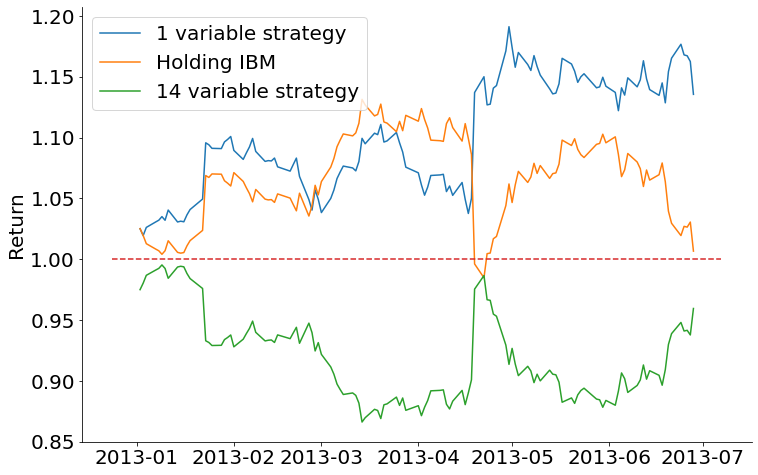

In [56]:
plt.figure(figsize=(12, 8))

plt.plot(df_returns_late.Date, df_returns_late.cumulative_return_1, label='1 variable strategy')
plt.plot(df_returns_late.Date, (1+df_returns_late.return_today).cumprod(), label='Holding IBM')
plt.plot(df_returns_late.Date, df_returns_late.cumulative_return_14, label='14 variable strategy')
plt.plot(plt.xlim(), [1, 1], linestyle='--')

plt.legend(fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('Return', fontsize=20)

sns.despine()

# Train versus test sets

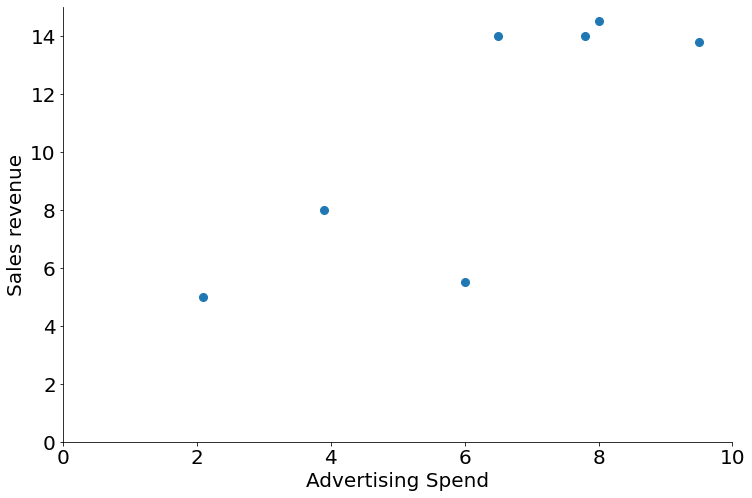

In [57]:
df_train_test = pd.DataFrame({'x':[2.1, 3.9, 6, 6.5, 7.8, 8, 9.5],
                                'y':[5, 8, 5.5, 14, 14, 14.5, 13.8]})

plt.figure(figsize=(12, 8))

plt.plot(df_train_test.x, df_train_test.y, marker='o', markersize=8, linewidth=0)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Advertising Spend', fontsize=20)
plt.ylabel('Sales revenue', fontsize=20)

plt.ylim([0, 15])
plt.xlim([0, 10])

sns.despine()

In [58]:
model_1 = smf.ols('y ~ x', data = df_train_test).fit()

In [59]:
model_2 = smf.ols('''y ~ np.power(x,6) + np.power(x,5) + np.power(x,4)
                         + np.power(x,3) + np.power(x,2) + x''', data = df_train_test).fit()

In [60]:
xs = np.linspace(df_train_test.x.min()-0.5, df_train_test.x.max(), num=500)
ys_1 = model_1.predict(pd.DataFrame({'x':xs}))
ys_2 = model_2.predict(pd.DataFrame({'x':xs}))

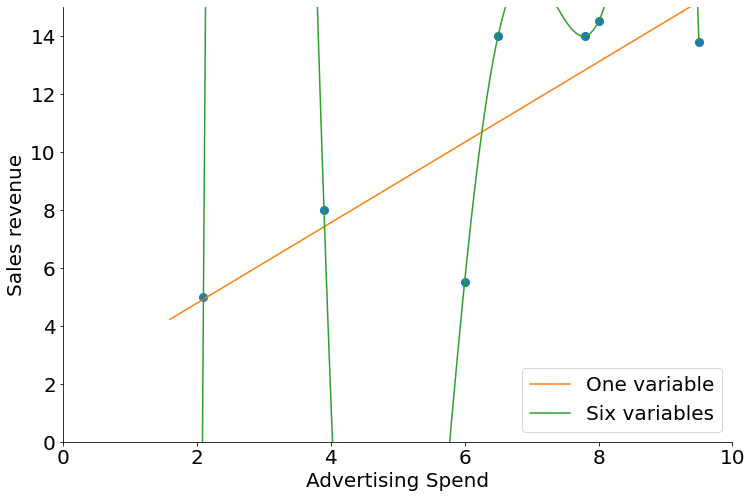

In [61]:
plt.figure(figsize=(12, 8))

plt.plot(df_train_test.x, df_train_test.y, marker='o', markersize=8, linewidth=0)

plt.plot(xs, ys_1, label='One variable')
plt.plot(xs, ys_2, label='Six variables')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Advertising Spend', fontsize=20)
plt.ylabel('Sales revenue', fontsize=20)

plt.legend(fontsize=20)

plt.ylim([0, 15])
plt.xlim([0, 10])

sns.despine()

# Testng our strategy over time

In [62]:
# Create a list of sequential 6 month intervals. Our model will be
# trained on each interval, and then evaluated on the next one
intervals = [j for i in range(2012,2020)
                     for j in [(f'{i}-01-01', f'{i}-06-30'),
                                    (f'{i}-07-01', f'{i}-12-31')]]

In [63]:
# Create the lagged columns
lagged_cols = {'1D':1, '3D':3, '1W':7, '2W':2*7, '3W':3*7,
                '1M':30, '6W':6*7, '2M':2*30, '3M':3*30, '4M':4*30,
                   '5M':5*30, '6M':6*30, '9M':9*30, '1Y':365}

df_implement = df_ibm.copy()
df_implement['return_today'] = (df_implement['Adj Close']/
                                         df_implement['Adj Close'].shift(1)) - 1

for col in lagged_cols:
    df_implement[f'return_{col}'] = ( df_implement.return_today
                                                  .rolling(lagged_cols[col])
                                                  .mean()
                                                  .shift(1) )

df_implement = df_implement[['Date', 'return_today']
                                + [f'return_{col}' for col in lagged_cols]]

In [64]:
# Create a DataFrame containing the periods we're going to be looking
# at in these strategies
df_implement = df_implement[(df_implement.Date >= intervals[0][0])
                                 & (df_implement.Date <= intervals[-1][1])].copy()

In [65]:
# Create a blank column to store predictions for the 1 variable
# and 14 variable strategies
df_implement['pred_return_today_1'] = None
df_implement['pred_return_today_14'] = None

In [66]:
for i in range(len(intervals) - 1):
    this_interval = intervals[i]
    next_interval = intervals[i+1]
    
    # Train the model on this interval
    df_train = df_implement[(df_implement.Date >= this_interval[0])
                                & (df_implement.Date <= this_interval[1])]
    
    X_1var  = df_train[['return_1D']]
    X_14var = df_train[[f'return_{i}' for i in lagged_cols]]
    y       = df_train.return_today
    
    lm_1 = sk_lm.LinearRegression().fit(X_1var, y)
    lm_14 = sk_lm.LinearRegression().fit(X_14var, y)
    
    # Make predictions on the *next* intervals
    next_interval_rows = ( (df_implement.Date >= next_interval[0])
                               & (df_implement.Date <= next_interval[1]) )
    
    df_predict = df_implement[next_interval_rows]
    
    df_implement.loc[next_interval_rows, 'pred_return_today_1'] = (
            lm_1.predict(df_predict[['return_1D']]))
    
    df_implement.loc[next_interval_rows, 'pred_return_today_14'] = (
            lm_14.predict(df_predict[[f'return_{i}' for i in lagged_cols]]))

In [67]:
# Drop the first interval, which was only used for training
df_implement = df_implement[(df_implement.Date >= intervals[1][0])
                                 & (df_implement.Date <= intervals[-1][1])].copy()

In [68]:
# Implement the two strategies
df_implement['decision_last_night_1'] = np.sign(df_implement.pred_return_today_1)
df_implement['decision_last_night_14'] = np.sign(df_implement.pred_return_today_14)

df_implement['strategy_return_1'] = 1 + (df_implement.return_today
                                                * df_implement.decision_last_night_1)
df_implement['strategy_return_14'] = 1 + (df_implement.return_today
                                                * df_implement.decision_last_night_14)

df_implement['cumulative_return_1'] = df_implement.strategy_return_1.cumprod()
df_implement['cumulative_return_14'] = df_implement.strategy_return_14.cumprod()

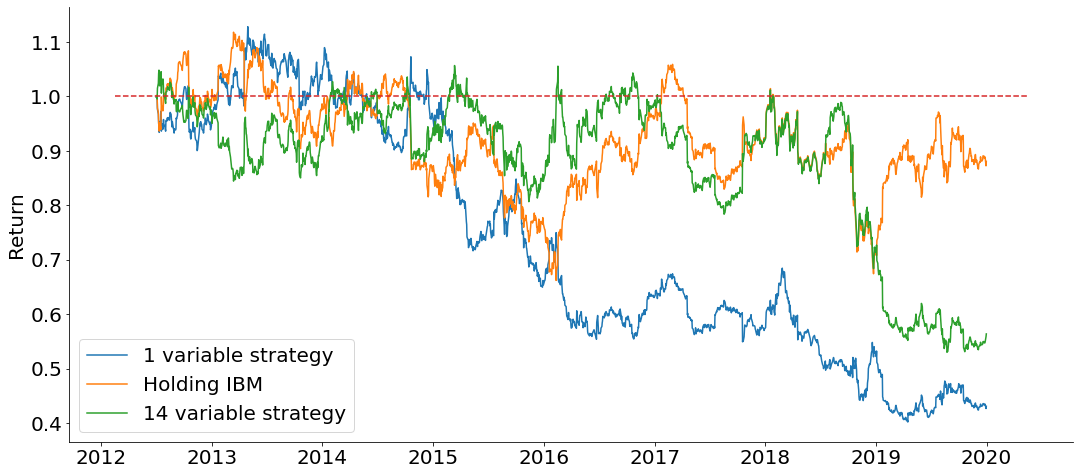

In [69]:
plt.figure(figsize=(18, 8))

plt.plot(df_implement.Date, df_implement.cumulative_return_1, label='1 variable strategy')
plt.plot(df_implement.Date, (1+df_implement.return_today).cumprod(), label='Holding IBM')
plt.plot(df_implement.Date, df_implement.cumulative_return_14, label='14 variable strategy')
plt.plot(plt.xlim(), [1, 1], linestyle='--')

plt.legend(fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylabel('Return', fontsize=20)

sns.despine()

# Splitting training/test sets

In [70]:
import sklearn.model_selection as sk_ms
df_train, df_test = sk_ms.train_test_split(df_nomis, train_size=0.8, random_state=123)

In [71]:
print(len(df_nomis))
df_nomis.head(2)

208085


,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
0,3,695,2002-07-01,72,35000.0,,N,6.25,0,7.49,1.8388,1
1,1,751,2002-07-01,60,40000.0,,N,5.65,0,5.49,1.8388,3


In [72]:
print(len(df_train))
df_train.head(2)

166468


,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
104318,3,694,2003-09-17,60,68000.0,,N,4.25,0,5.49,1.12,1
56920,3,675,2003-05-02,60,30000.0,,N,4.39,0,5.15,1.31,3


In [73]:
print(len(df_test))
df_test.head(2)

41617


,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
187681,1,759,2004-08-23,36,30000.0,,N,2.99,0,2.99,1.6150,1
40041,3,690,2003-02-27,60,45000.0,,N,4.49,0,5.15,1.3375,1
